# Load h5ad data with scanpy

[Scanpy](https://scanpy.readthedocs.io/en/stable/index.html) – a package for Single-Cell Analysis in Python. It provides a [function](https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html#scanpy.read_h5ad
) to load data in h5ad format. The paper also provides the sparse matrix (mtx.gz) in [h5ad format](http://catlas.org/catlas_downloads/humantissues/Cell_by_cCRE/).

**Note:** a customized function is provided in the fewshotbench example

In [339]:
import scanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [340]:
# load the matrix.h5ad from http://catlas.org/catlas_downloads/humantissues/Cell_by_cCRE/ 
### NOTE: when running on google cloud VM, memory allocation seems to be an issue
### add backed to reduce memory usage, see https://github.com/scverse/scanpy/issues/434 
adata = scanpy.read_h5ad("data/Cell_by_cCRE/matrix.h5ad", backed="r")
adata

AnnData object with n_obs × n_vars = 1323041 × 1154611 backed at 'data/Cell_by_cCRE/matrix.h5ad'

# AnnData format

[Anndata](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html) is short for annotated data. The h5ad provided in the dataset website has very minimum annotation. We can build up the layers of observation (e.g, cell type annotation given in the paper) and layers of variable (e.g, classes of the cCRE <promoter, distal etc.>).

In [341]:
# initial data
# sparse matrix of shape (#cell, #feature)
adata.X

<HDF5 sparse dataset: format 'csr', shape (1323041, 1154611), type '<i8'>

In [342]:
# obs: cell ID (barcodes in this case)
adata.obs

""
barcodes
LungMap_D122_1+AAACTACCAGCTGCGCTTATCC
LungMap_D122_1+AACTGCGCCATCCACTTGGATA
LungMap_D122_1+AACTTCTGCTCACCTGTAAGAC
LungMap_D122_1+AATTCGGATGAGATCTGTGACG
LungMap_D122_1+AATTCGGATGGTCCGGTCCAAA
...
spleen_sample_57_1+TTGGTTAACCCTTCAGGCCATTGGCCAGGTCCTCGTCATA
spleen_sample_57_1+TTGGTTGGTACGTAGCCGTAGATAGCCGATTTGCTCGATT
spleen_sample_57_1+TTGGTTGGTACTAAGAGTTATACCTTAGCTACCAGTTATT


In [343]:
# var: features, in this case candidate cis-regulatory elements (cCRE)
adata.var

""
Feature_ID
chr1:9955-10355
chr1:29163-29563
chr1:79215-79615
chr1:102755-103155
chr1:180580-180980
...
chrY:56676947-56677347
chrY:56677442-56677842
chrY:56678029-56678429


# Adding aligned metadata

## Add more information about the cells 
Additional information of each cell includes: 
1. `cellID`: unique ID (same as the `barcodes` in the `adata.obs`). 

    In single cell experiments, each cell can be marked by a unique `barcode`, so that in later sequencing we can retrive this information and distinguish between individual cells. 
2. `logUMI`: log10 number of unique fragment passing QC. 

    [Unique Molecular Identifier](https://dnatech.genomecenter.ucdavis.edu/faqs/what-are-umis-and-why-are-they-used-in-high-throughput-sequencing/) are used to label uniquely each transcript captured in a single-cell sequencing experiment. This labeling helps in accurately quantifying gene expression For downsteam analysis, it is typical to filter out cells with very low (log)UMI values, so to keep cells that are transcriptionally active. 
3. `tsse`: TSS enrichment. 

    Transcription Start Site (TSS) Enrichment Score is a metric used to evaluate the quality of sequencing data, specifically how well the sequencing method has enriched for regions around transcription start sites. This [image](https://scalex.readthedocs.io/en/latest/_images/tutorial_Integration_cross-modality_11_0.png) shows the differece between high and low TSSE. A higher TSS enrichment score indicates that the sequencing method effectively targeted these key regulatory regions. 
4. `tissue`: The ID of tissue sample
5. `cell type`: The name of the cell type. **TODO** Maybe we can merge cell types between fetal and adults?
6. `Life stage`: Fetal or Adult

In [344]:
cell_metadata = pd.read_csv('data/Cell_metadata.tsv.gz', sep='\t', compression='gzip')
# Rename cellID to barcodes, to be consistant with adata.obs
cell_metadata.rename(columns={"cellID": "barcodes"}, inplace=True)

cell_metadata['tissue_full'] = cell_metadata['tissue']

# Get tissue names: need some mannual work
cell_metadata['tissue'] = cell_metadata['tissue'].str.rsplit('_', n=1).str[0]
# Remove '_sample'
cell_metadata['tissue'] = cell_metadata['tissue'].str.replace('_sample', '', regex=False)
# Remove '_CARE' followed by any digit
cell_metadata['tissue'] = cell_metadata['tissue'].str.replace('_CARE.*', '', regex=True)
# Remove 'Map'
cell_metadata['tissue'] = cell_metadata['tissue'].str.replace('Map', '', regex=False)
# Change to lower 
cell_metadata['tissue'] = cell_metadata['tissue'].str.lower()


In [345]:
adata.obs = adata.obs.merge(cell_metadata, on='barcodes', how='left')

# adata prefers the index to be strings, not [1,2,3...]
# so we use barcodes as the index
adata.obs.index = adata.obs.barcodes.astype(str)
adata.obs = adata.obs.drop(columns=['barcodes'])

# change the dtype of columns 
for col in adata.obs.columns:
    if adata.obs[col].dtype != 'float64':
        adata.obs[col] = adata.obs[col].astype('category')
adata.obs

,logUMI,tsse,tissue,cell type,Life stage,tissue_full
barcodes,,,,,,
LungMap_D122_1+AAACTACCAGCTGCGCTTATCC,3.396374,16.133163,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AACTGCGCCATCCACTTGGATA,3.008174,21.010101,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AACTTCTGCTCACCTGTAAGAC,3.201670,10.760668,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AATTCGGATGAGATCTGTGACG,3.236789,13.146853,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AATTCGGATGGTCCGGTCCAAA,3.119915,10.211706,lung,Cilliated Cell,Adult,LungMap_D122
...,...,...,...,...,...,...
spleen_sample_57_1+TTGGTTAACCCTTCAGGCCATTGGCCAGGTCCTCGTCATA,3.134177,13.333333,spleen,Fetal Fibroblast (Splenic),Fetal,spleen_sample_57
spleen_sample_57_1+TTGGTTGGTACGTAGCCGTAGATAGCCGATTTGCTCGATT,3.485721,14.117647,spleen,Fetal Fibroblast (Splenic),Fetal,spleen_sample_57
spleen_sample_57_1+TTGGTTGGTACTAAGAGTTATACCTTAGCTACCAGTTATT,4.363687,8.497675,spleen,Fetal Fibroblast (Splenic),Fetal,spleen_sample_57


## Add more information about the cCRE (candidate [cis-regulatory elements](https://en.wikipedia.org/wiki/Cis-regulatory_element))
Additional information of the CRE includes:
1. `chromosome`: name of the chromosome.

    This paper used [Genome assembly hg38](https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001405.26/) as the reference genome (hg38 means something like the version of this release). In theory, it has 24 chromosomes (22 + X + Y + MT(mitochondrial)). However, there are also some weird names such as "chr14_GL000009v2_random", which are alternative sequences or haplotypes for specific regions of the genome. These are not standard chromosomes but are additional sequences that provide alternative versions of certain genomic regions. 

2. `hg38_Start`: 0-based starting location of the cCRE in the genome (hg38).
3. `hg38_End`: End of the cCRE in the genome (hg38).
4. `class`: Promoter (-200 to +200 of TSS), Promoter Proximal (less) or Distal

    [Promoter](https://www.genome.gov/genetics-glossary/Promoter#:~:text=A%20promoter%2C%20as%20related%20to,molecule%20(such%20as%20mRNA).) is a region in DNA (close to transcription starting site) that regulates gene transcription. The exact location of promoter to TSS is not the same for each gene. This paper defines the promoter to be located in -200 to +200 bases to the TSS, CRE close to promter as promoter proximal, others as distal.
5. `Present in fetal tissues`: if this cCRE is detected in at least one fetal tissue
6. `Present in adult tissues`: if this cCRE is detected in at least one adult tissue
7. `CRE module`: The ID of CRE module that the cCRE belongs to.

In [346]:
cCRE_hg38 = pd.read_csv('data/cCRE_hg38.tsv.gz', sep='\t', compression='gzip')
# Add a 'Feature_ID' column so that we can add it to the adata.var
cCRE_hg38['Feature_ID'] = cCRE_hg38['#Chromosome'].astype(str) + ':' + cCRE_hg38['hg38_Start'].astype(str) + '-' + cCRE_hg38['hg38_End'].astype(str)
#cCRE_hg38

In [347]:
# Have a look as the chromosomes. **NOTE** There are non-standard chromosomes. 
print("Number of unique chromosomes: ", len(cCRE_hg38["#Chromosome"].unique()))
print(cCRE_hg38["#Chromosome"].unique())

Number of unique chromosomes:  34
['chr1' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr14_GL000009v2_random'
 'chr15' 'chr15_KI270850v1_alt' 'chr16' 'chr17' 'chr17_KI270909v1_alt'
 'chr18' 'chr19' 'chr19_KI270938v1_alt' 'chr1_KI270706v1_random' 'chr2'
 'chr20' 'chr21' 'chr22' 'chr22_KI270879v1_alt' 'chr3' 'chr4'
 'chr4_GL000008v2_random' 'chr5' 'chr6' 'chr7' 'chr7_KI270803v1_alt'
 'chr8' 'chr8_KI270821v1_alt' 'chr9' 'chrUn_KI270742v1' 'chrX' 'chrY']


In [348]:
adata.var = adata.var.merge(cCRE_hg38, on='Feature_ID', how='left')
# also change the index
adata.var.index = adata.var.Feature_ID.astype(str)
adata.var = adata.var.drop(columns = "Feature_ID")
adata.var

,#Chromosome,hg38_Start,hg38_End,Class,Present in fetal tissues,Present in adult tissues,CRE module
Feature_ID,,,,,,,
chr1:9955-10355,chr1,9955,10355,Promoter Proximal,yes,yes,146
chr1:29163-29563,chr1,29163,29563,Promoter,yes,yes,37
chr1:79215-79615,chr1,79215,79615,Distal,no,yes,75
chr1:102755-103155,chr1,102755,103155,Distal,no,yes,51
chr1:180580-180980,chr1,180580,180980,Promoter Proximal,no,yes,146
...,...,...,...,...,...,...,...
chrY:56676947-56677347,chrY,56676947,56677347,Distal,yes,no,37
chrY:56677442-56677842,chrY,56677442,56677842,Distal,yes,no,37
chrY:56678029-56678429,chrY,56678029,56678429,Distal,yes,no,37


# Subset the adult data

In [349]:
bdata = adata[adata.obs["Life stage"] == "Adult"]
print("Number of unique tissues: ", len(bdata.obs.tissue.unique()))
print("Number of unique cell types: ", len(bdata.obs['cell type'].unique()))
bdata.obs

Number of unique tissues:  30
Number of unique cell types:  111


,logUMI,tsse,tissue,cell type,Life stage,tissue_full
barcodes,,,,,,
LungMap_D122_1+AAACTACCAGCTGCGCTTATCC,3.396374,16.133163,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AACTGCGCCATCCACTTGGATA,3.008174,21.010101,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AACTTCTGCTCACCTGTAAGAC,3.201670,10.760668,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AATTCGGATGAGATCTGTGACG,3.236789,13.146853,lung,Cilliated Cell,Adult,LungMap_D122
LungMap_D122_1+AATTCGGATGGTCCGGTCCAAA,3.119915,10.211706,lung,Cilliated Cell,Adult,LungMap_D122
...,...,...,...,...,...,...
muscle_SM-JF1O9_1+TTCGTCCGACTTAGTGCTAGCA,3.720159,11.500548,muscle,Type I Skeletal Myocyte,Adult,muscle_SM-JF1O9
muscle_SM-JF1O9_1+TTCGTCCGACTTCCGAGCAACT,3.703291,13.125912,muscle,Type I Skeletal Myocyte,Adult,muscle_SM-JF1O9
muscle_SM-JF1O9_1+TTCGTCCGACTTCCTCAGCCTC,3.750123,23.130715,muscle,Type I Skeletal Myocyte,Adult,muscle_SM-JF1O9


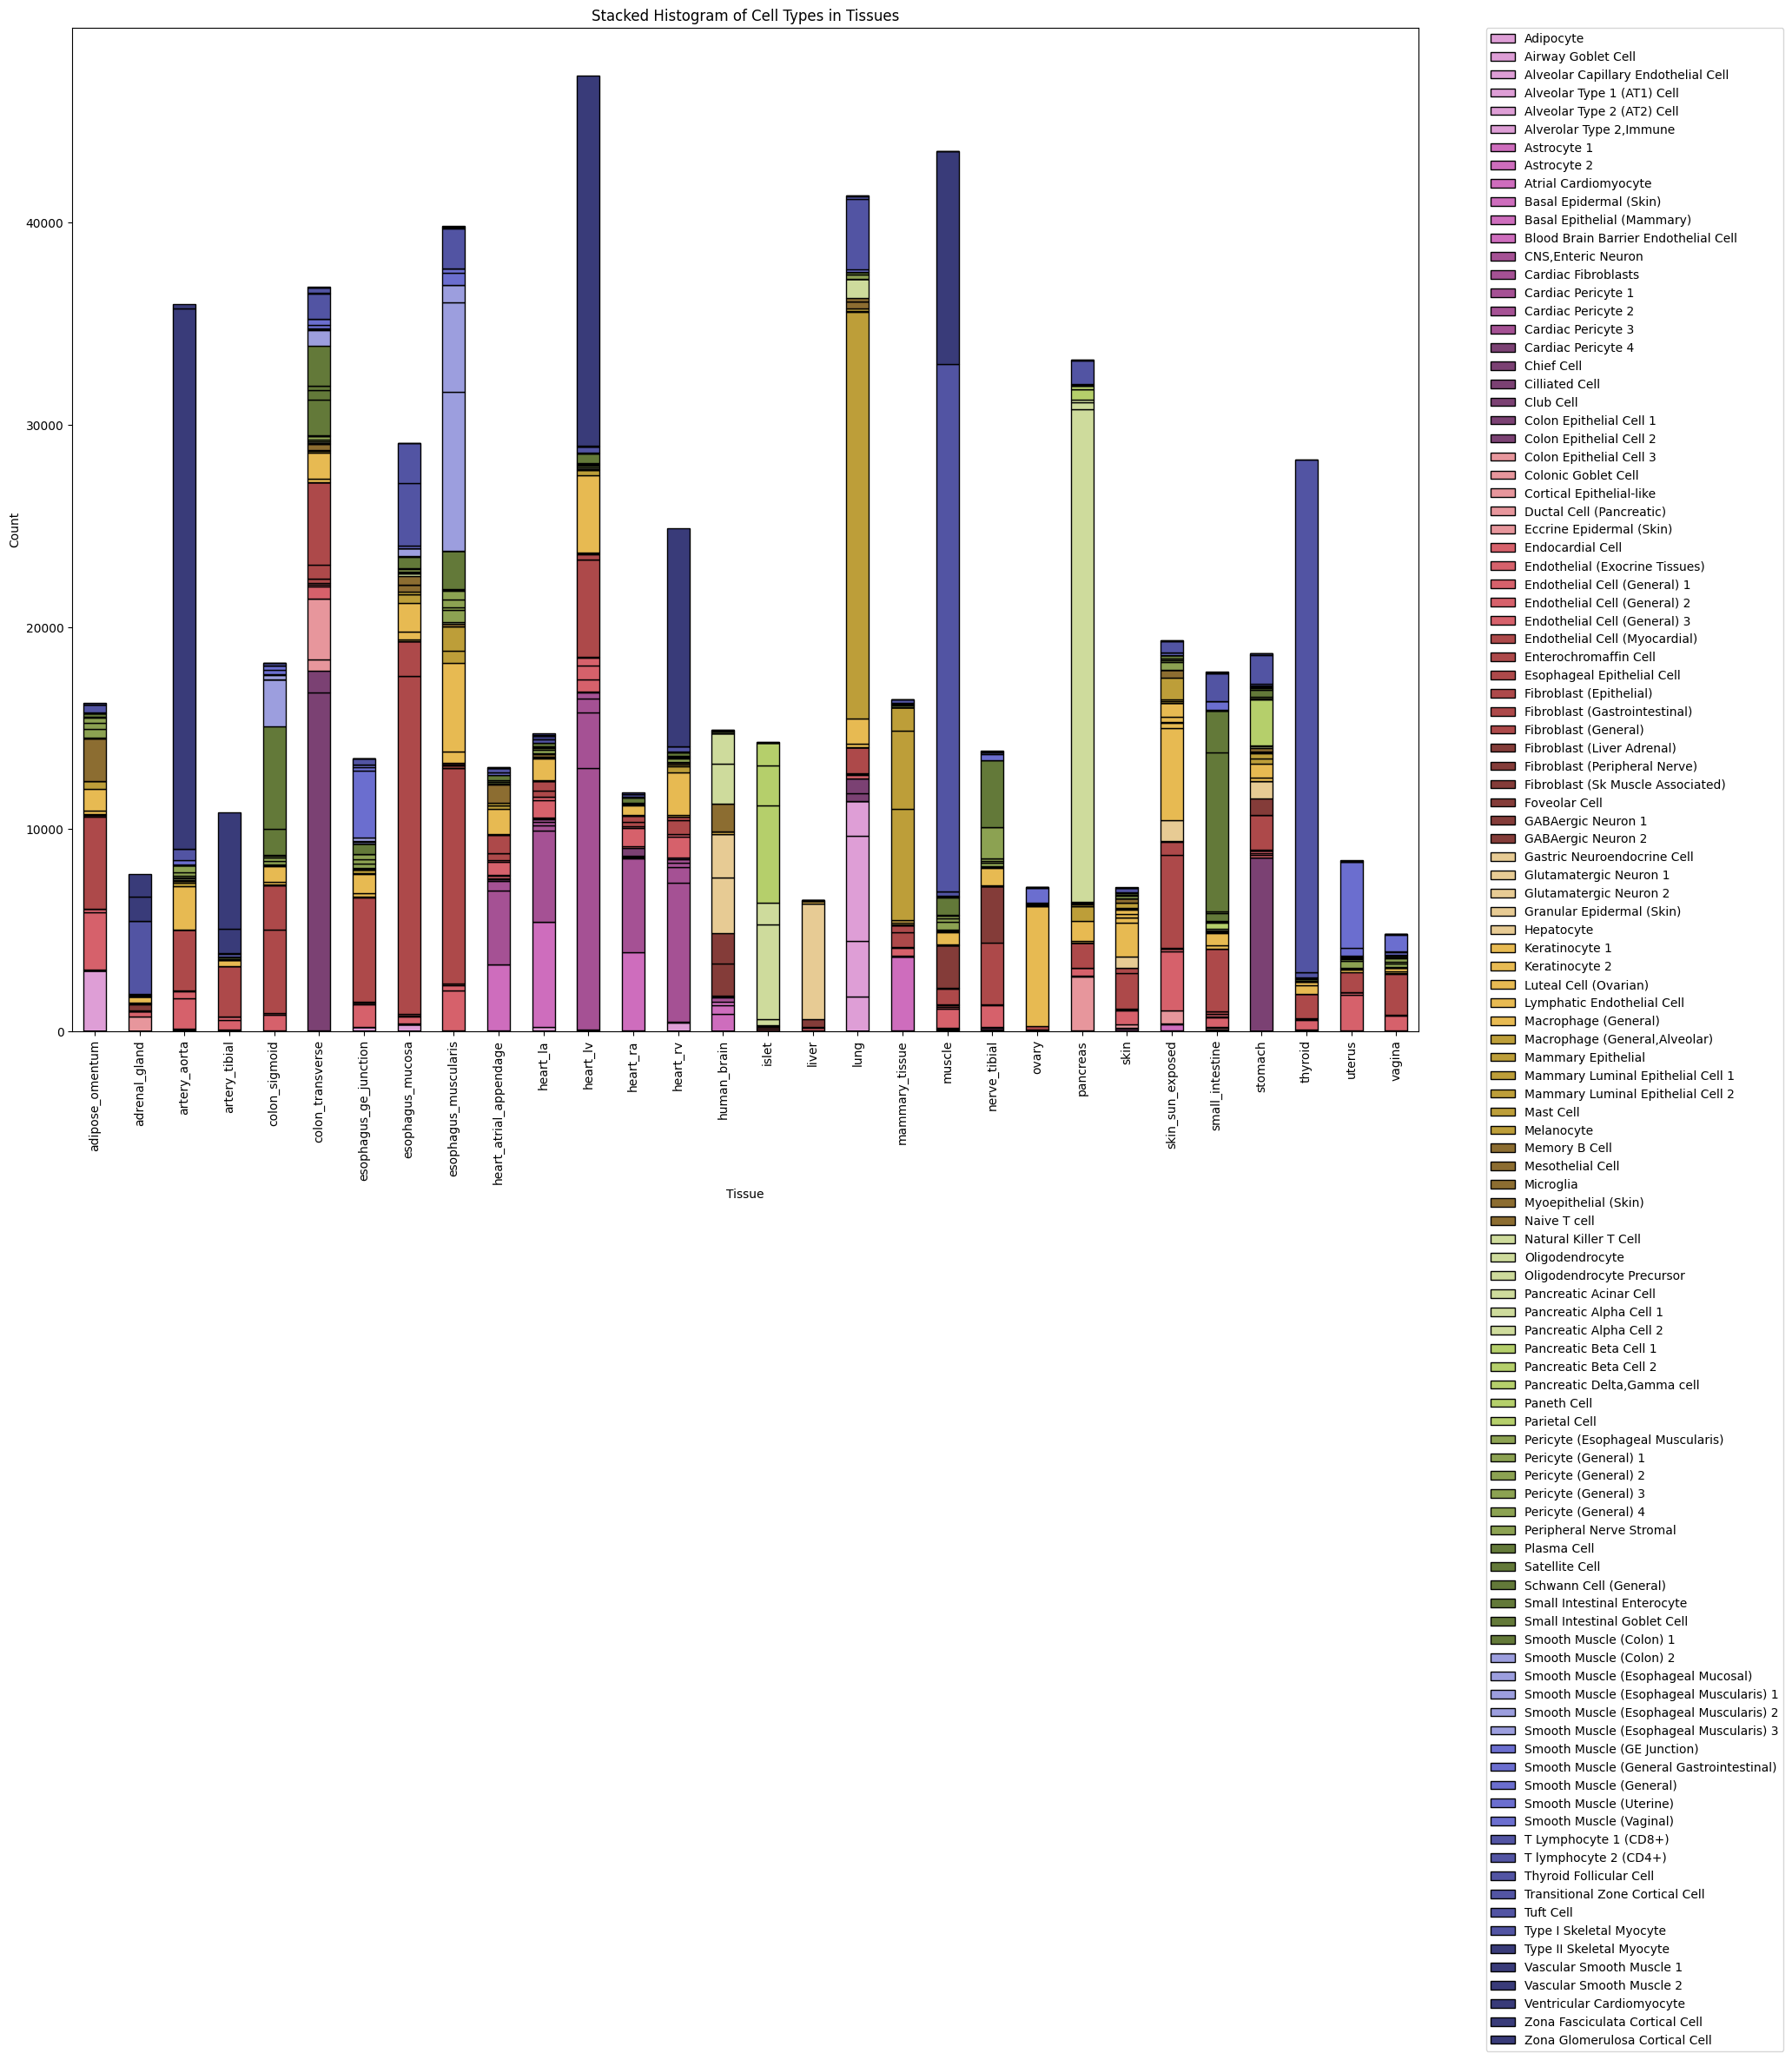

In [350]:
# Group by 'tissue' and 'cell type' and count
grouped_data = bdata.obs.groupby(['tissue', 'cell type']).size().reset_index(name='count')

# Pivot the data
pivot_data = grouped_data.pivot(index='tissue', columns='cell type', values='count').fillna(0)
#pivot_data = grouped_data.pivot(columns='tissue', index='cell type', values='count').fillna(0)

cmap = plt.get_cmap('tab20b_r') 
colors = cmap(np.linspace(0, 1, len(pivot_data.columns)))

# Plot
pivot_data.plot(kind='bar', stacked=True, color = colors, edgecolor='black', figsize=(20, 15))
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Stacked Histogram of Cell Types in Tissues')

# this is kinda ugly, but a nice way to see what is happening 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

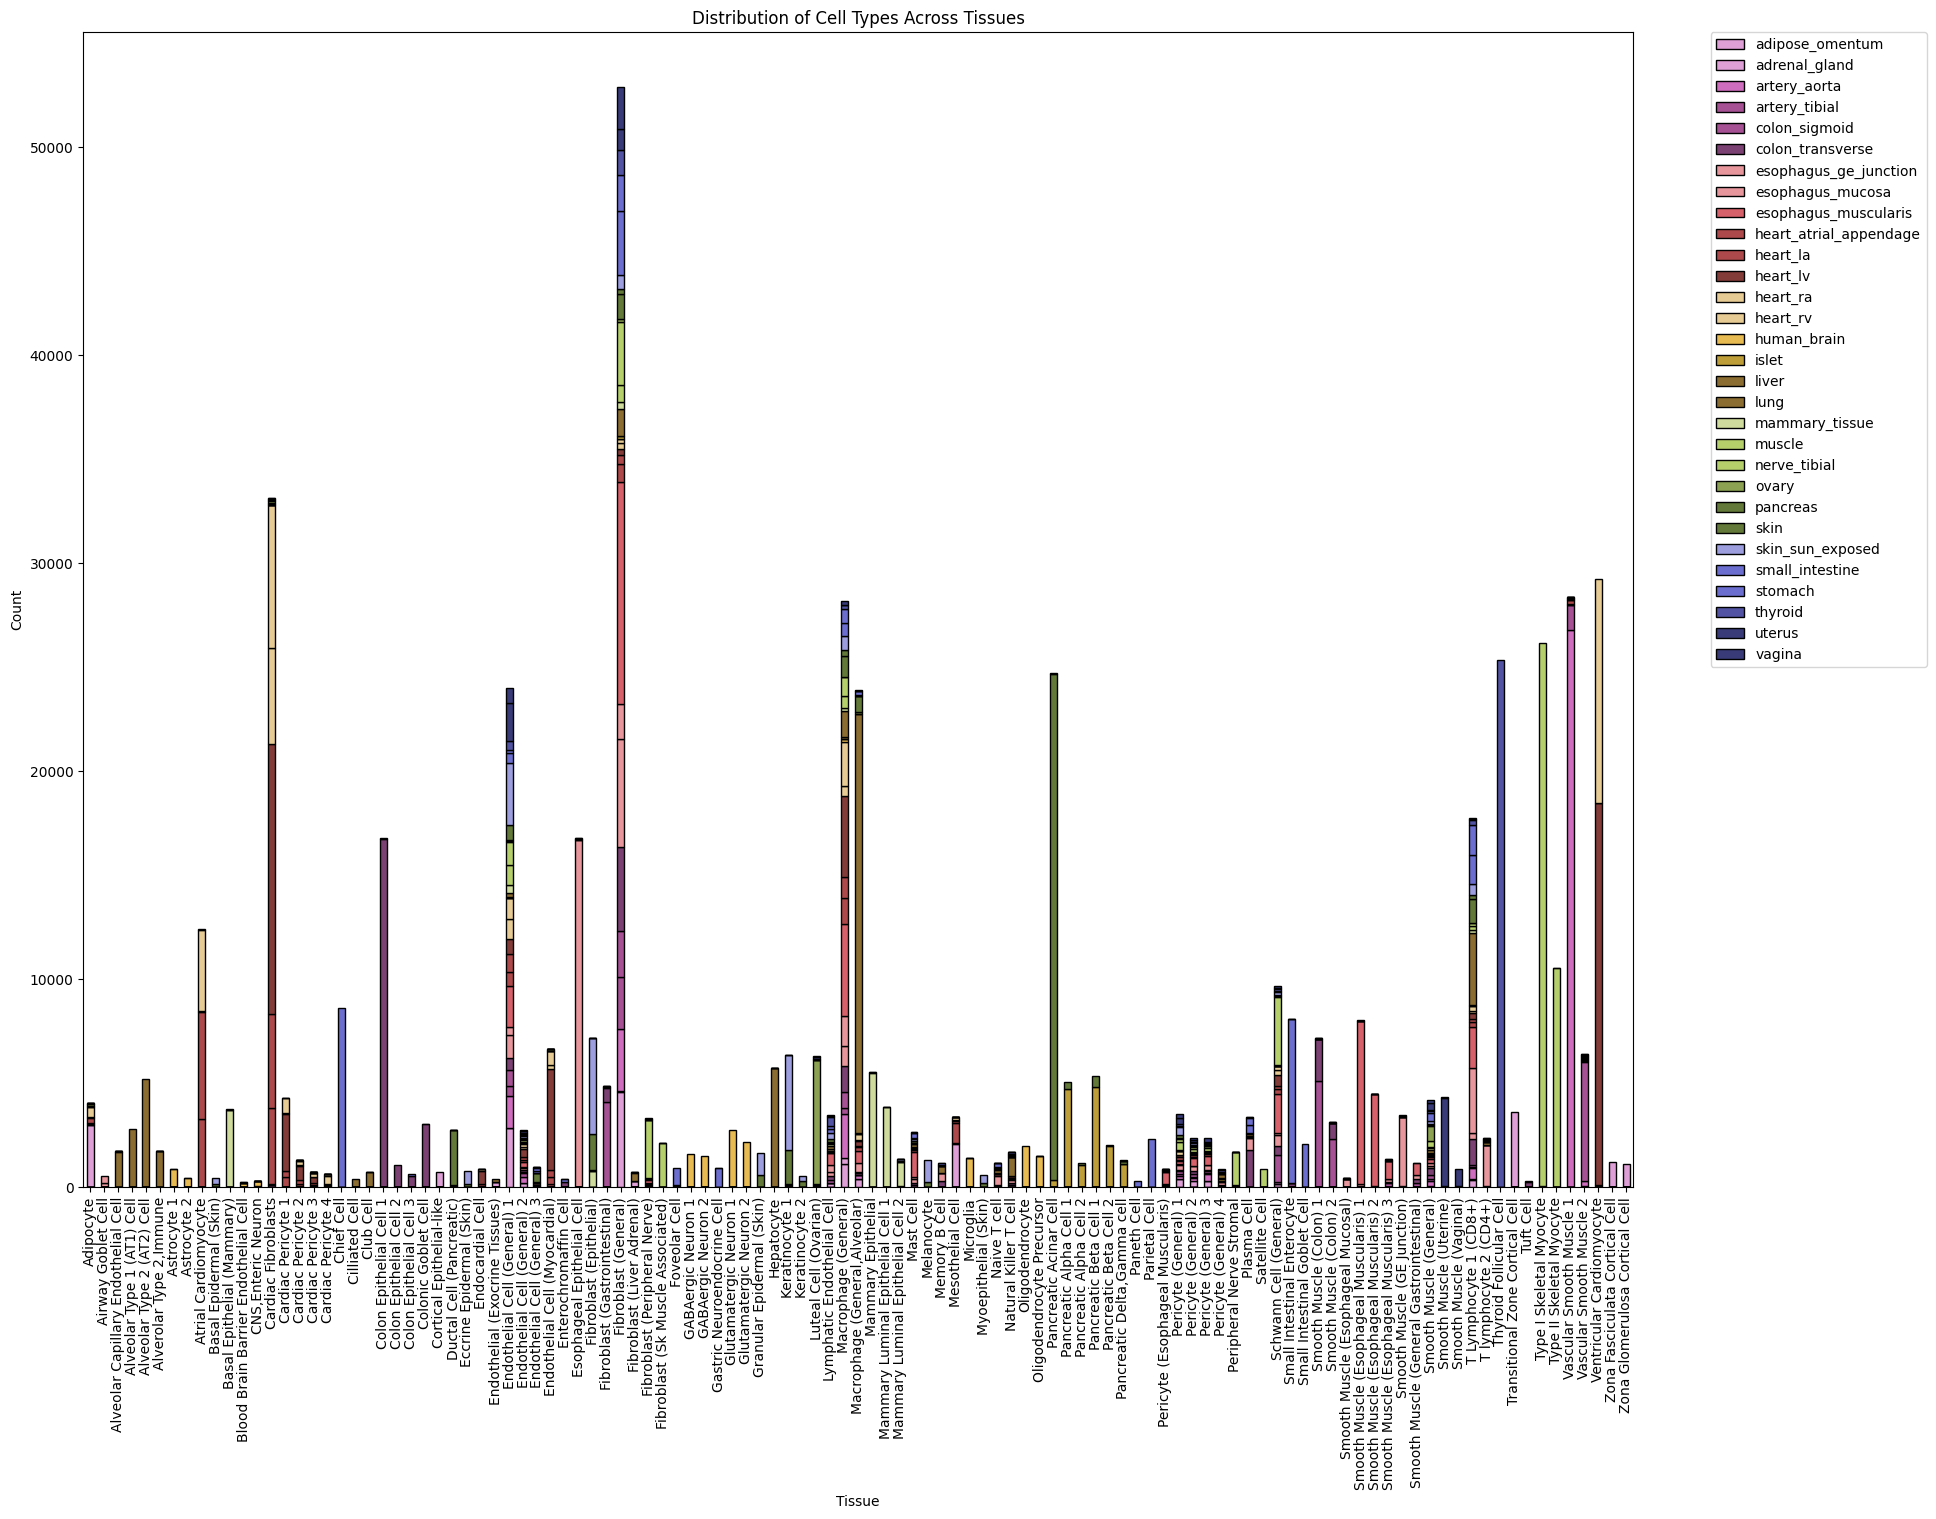

In [351]:
# Group by 'tissue' and 'cell type' and count
grouped_data = bdata.obs.groupby(['tissue', 'cell type']).size().reset_index(name='count')

# Pivot the data
#pivot_data = grouped_data.pivot(index='tissue', columns='cell type', values='count').fillna(0)
pivot_data = grouped_data.pivot(columns='tissue', index='cell type', values='count').fillna(0)

cmap = plt.get_cmap('tab20b_r') 
colors = cmap(np.linspace(0, 1, len(pivot_data.columns)))

# Plot
pivot_data.plot(kind='bar', stacked=True, color = colors, edgecolor='black', figsize=(20, 15))
plt.xlabel('Tissue')
plt.ylabel('Count')
plt.title('Distribution of Cell Types Across Tissues')

# this is kinda ugly, but a nice way to see what is happening 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# Interfacing pytorch models

AnnData format can directly interface with pytorch (need to check more on this): https://anndata.readthedocs.io/en/latest/tutorials/notebooks/annloader.html# 

In [352]:
from anndata.experimental.pytorch import AnnLoader

In [353]:
# Tentatively try the dataloader 
### NOTE: if this fails, try restart the kernel, see https://github.com/ipython/ipython/issues/13598
dataloader = AnnLoader(adata, batch_size=128, shuffle=True)
dataloader.dataset

AnnCollection object with n_obs × n_vars = 1323041 × 1154611
  constructed from 1 AnnData objects
    obs: 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage', 'tissue_full'